# ARIMA

* AutoRegressive Integrated MovingAverage
* An advanced autoregressive model
* gives short-term forecasts

### 1) Stationarity

A time series is said to be stationary if the mean and the variance of the series stay constant over time.

* no trend
* no seasonality

**To use ARIMA, the data has to be stationary**

#### How do we achieve stationarity?

- Differencing
- Percentage change
- Estimating a trend via OLS


#### How do we check for stationarity?

- Plot the timeseries and eyeball it

- Check whether the mean or the variance increase over time. Take different subsets of the data and calculate sample mean and sample variance.

- Use the Dickey-Fuller test (from statsmodels.tsa.stattools import adfuller)


### 2) AR(p)

An AR model assumes that $y_t$ can be modelled as a combination of prior values of $y$. An AR(1) model for example looks like:

$y_t = \beta_0 + \beta_1 * y_{t-1} + \epsilon_t$


### 3) I(r)

The parameter r determines how often a time series has to be integrated until it is stationary.


### 4) MA(q)

Assumption:

White noise process: IID $\epsilon$ with $E[\epsilon]=0$ and $Var[\epsilon]=\sigma^2$

MA(2) model:

$y_t = \delta + \epsilon_t +  \alpha_1 * \epsilon_{t-1} + \alpha_2 * \epsilon_{t-2}$


**ARIMA = AR(p) + I(r) + MA(q)**

## Let us construct our own AR, MA and AR(I)MA processes

### AR

In [2]:
import random
import matplotlib.pyplot as plt

In [19]:
# generate data (200 periods) using an AR(3) process
random.seed(10)

AR = [0, 0, 0]
c = 0.0
a1 = 0.4
a2 = 0.1
a3 = 0.1

for i in range(197):
    yt = c + a1 * AR[-1] + a2 * AR[-2] + a3 * AR[-3] + random.gauss(0.0, 1.0)
    AR.append(yt)

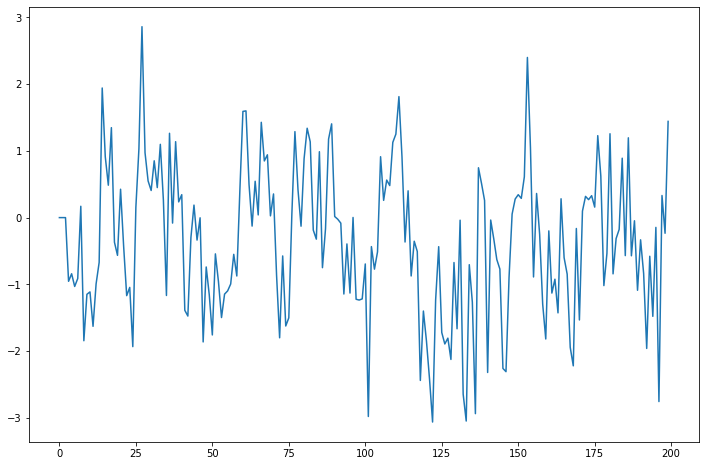

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(AR)

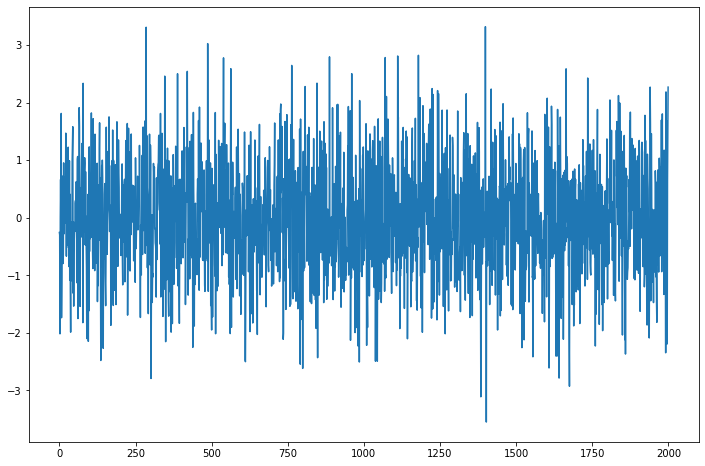

In [18]:
# Let's compare with white noise
white_noise = []
for i in range(2000):
    white_noise.append(random.gauss(0, 1))

plt.figure(figsize=(12, 8))
plt.plot(white_noise)

In [10]:
sum(AR)/len(AR)

4.513410578640584

### Autrocorrelation

$\rho_h = \frac{Cov(y_t, y_{t-h})}{Var(y_t)}$

- Plot the autocorrelation function

Figure(432x288)


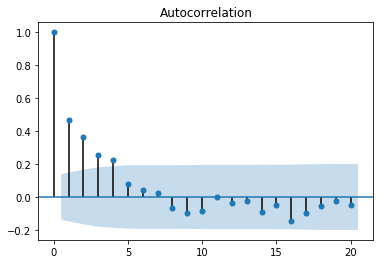

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

print(plot_acf(AR, lags=20))

In the above plot, there is information left that we can use to predict/model the future

Figure(432x288)


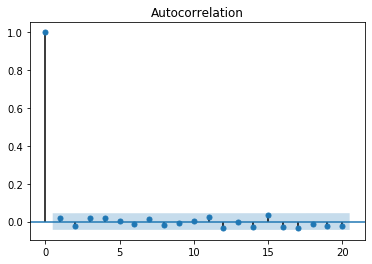

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

print(plot_acf(white_noise, lags=20))

### Train an ARIMA Model

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
y_train = AR[:180]
y_test = AR[180:]

In [42]:
m = ARIMA(y_train, (2, 0, 2)) # (ar, d, ma) <- Order of the ARIMA model
m.initialize()
r = m.fit()
# Task: play with the hyperparameters and see which gives the best score (AIC)

In [43]:
r.params

array([-0.35454296,  0.23409032,  0.36521892,  0.21282732, -0.17868278])

In [44]:
r.conf_int(alpha=.1)

array([[-0.6488901 , -0.06019583],
       [-1.64902093,  2.11720156],
       [-0.96904624,  1.69948407],
       [-1.65719598,  2.08285062],
       [-0.68548312,  0.32811755]])

In [45]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  180
Model:                     ARMA(2, 2)   Log Likelihood                -244.800
Method:                       css-mle   S.D. of innovations              0.942
Date:                Thu, 13 Aug 2020   AIC                            501.601
Time:                        10:52:23   BIC                            520.758
Sample:                             0   HQIC                           509.368
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3545      0.179     -1.981      0.049      -0.705      -0.004
ar.L1.y        0.2341      1.145      0.204      0.838      -2.010       2.478
ar.L2.y        0.3652      0.811      0.450      0.653      -1.225       1.955
ma.L1.y        0.2128      1.137      0.187      0.852      -2.015       2.441
ma.L2.y       -0.1787      0.308     -0.580      0.563      -0.783       0.425
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3650           +0.0000j            1.3650            0.0000
AR.2           -2.0059           +0.0000j            2.0059            0.5000
MA.1           -1.8440           +0.0000j            1.8440            0.5000
MA.2            3.0350           +0.0000j            3.0350            0.0000
-----------------------------------------------------------------------------
"""

In [46]:
ypred, err, conf = r.forecast(steps=20) # predicted, error, confidence
ypred.shape

(20,)

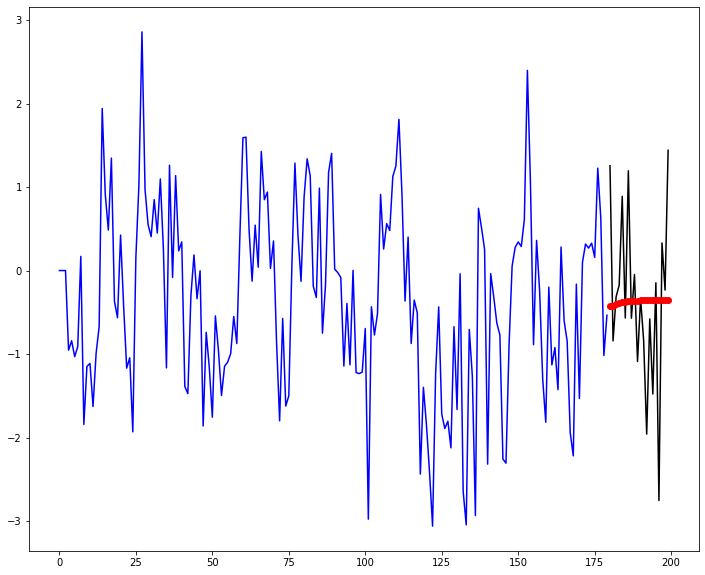

In [47]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(y_train)), y_train, color='blue')
plt.plot(range(180, 200), y_test, color='black')
plt.plot(range(180, 200), ypred, color='red', marker='o')

In [49]:
from statsmodels.tsa.stattools import adfuller

In [50]:
adfuller(white_noise)

(-43.71814418550092,
 0.0,
 0,
 1999,
 {'1%': -3.4336254962865045,
  '5%': -2.862986937508278,
  '10%': -2.567540287745173},
 5529.803449208557)

In [51]:
adfuller(x)

(-1.3347925102818399,
 0.6131082561881522,
 0,
 1999,
 {'1%': -3.4336254962865045,
  '5%': -2.862986937508278,
  '10%': -2.567540287745173},
 5528.936279040751)

In [52]:
adfuller(AR)

(-5.884454928466153,
 3.0245481178368716e-07,
 1,
 198,
 {'1%': -3.4638151713286316,
  '5%': -2.876250632135043,
  '10%': -2.574611347821651},
 516.8654446803394)